# Introduction

This notebook presents the fourth task from the Data Analysis Course. In this step, the variables manipulated from the New York Times Blog dataset are presented graphically. The goal is identify the relationship between popularity and news aspects, such as number of words, publication date and category.

# Setup

In this section the necessary libraries are loaded and the dataset, already manipulated in the previous steps, are read from file.

## Loading necessary libraries

In [1]:
import pandas as pd # Pandas for Data Frame 
import numpy as np # NumPy for vetorial operations
import seaborn as sns # Seaborn to present charts
import matplotlib.pyplot as plt # MatplotLib for general chart options

# Configure Jupyter to plot charts inline
%matplotlib inline

# Configure plot width and hight
figure_width, figure_height = 12, 6
figure_size, figure_aspect = 6, 2.2

## Loading the dataset

In [2]:
# Reads the CSV file using Pandas
dataset = pd.read_csv("NYTimesBlogPreprocessed.csv")

## Creating a function to generate frequency tables with absolute and relative values

In [3]:
def create_frequency_table(dataset, reference_column):
    """Create a data frame with absolute and relative frequency of a reference column

    Arguments:
      * dataset: a data frame
      * reference_column: the reference column from which the frequency will be computed

    Returns:
       * a data frame with relative and absolute frequency of a column

    """
    # Create a frequency table using the reference column
    frequency_table = dataset.groupby([reference_column], as_index=False).size()
    # Create a data frame with the absolute and relative frequency values
    return pd.DataFrame({reference_column: frequency_table.index.values, 
             'Absolute Frequency': frequency_table.values,
             'Relative Frequency': [(x/len(dataset)*100) for x in frequency_table.values] },
             columns=[reference_column, 'Absolute Frequency', 'Relative Frequency'])

## Presenting the first rows

This initial view shows the attributes available and their content.

In [4]:
# Presents the top 5 rows
dataset.head()

,NewsDesk,SectionName,WordCount,PubDate,Popular,WordCountBins,PubMonth,PubWeekday,PubDay,PubHour,IsWeekend
0,Business,Crosswords/Games,508,2014-09-01 22:00:09,1,"(256, 512]",9,0,1,22,False
1,Culture,Arts,285,2014-09-01 21:14:07,0,"(256, 512]",9,0,1,21,False
2,Business,Business Day,1211,2014-09-01 21:05:36,0,"(1024, 2048]",9,0,1,21,False
3,Business,Business Day,1405,2014-09-01 20:43:34,1,"(1024, 2048]",9,0,1,20,False
4,Science,Health,181,2014-09-01 18:58:51,1,"(128, 256]",9,0,1,18,False


# Graphical Representation

In this section the variables are presented in order to provide additional insights. There are two main subsections: **Analyzing Variables Individually** and **Analyzing Relationship between Variables**.

There is one quantitative variable (*WordCount*) and nine categorical variables:
* *NewsDesk*
* *SectionName*
* *WordCountBins*
* *Popular*
* *PubMonth*
* *PubWeekday*
* *PubDay*
* *PubHour*
* *IsWeekend*

The response variable is *Popular*, while the remaining ones are the explanatory.

## Analyzing Variables Individually

In this section, all categorical variables are presented with absolute and relative values using, respectively, horizontal and vertical bar plots. The quantitative variable is presented using a histogram.


### NewsDesk

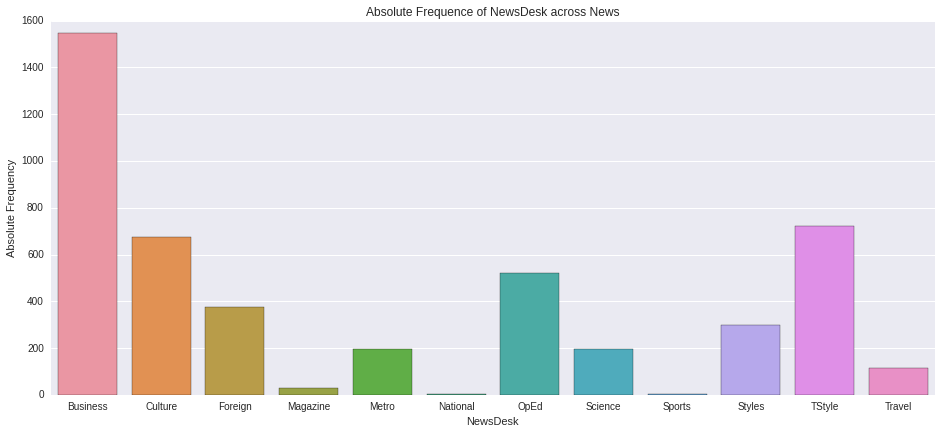

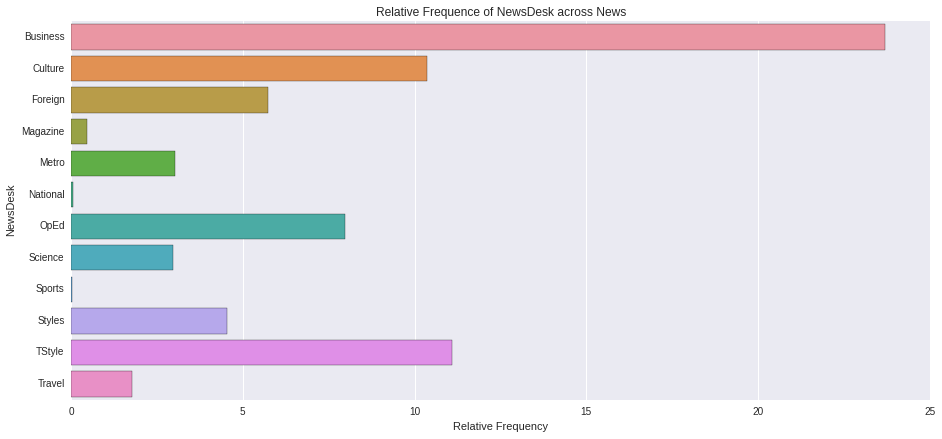

In [5]:
# Create a table with Absolute and Relative Frequency of NewsDesk
table = create_frequency_table(dataset, "NewsDesk")

# Create a plot using Absolute Frequency
sns.factorplot(x="NewsDesk", y="Absolute Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Absolute Frequence of NewsDesk across News')

# Create a plot using Relative Frequency
sns.factorplot(y="NewsDesk", x="Relative Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Relative Frequence of NewsDesk across News')

As the plot shows, Business has the higher number of news (about 24%), while Natial and Sports have the lowest frequency.

### Section Name

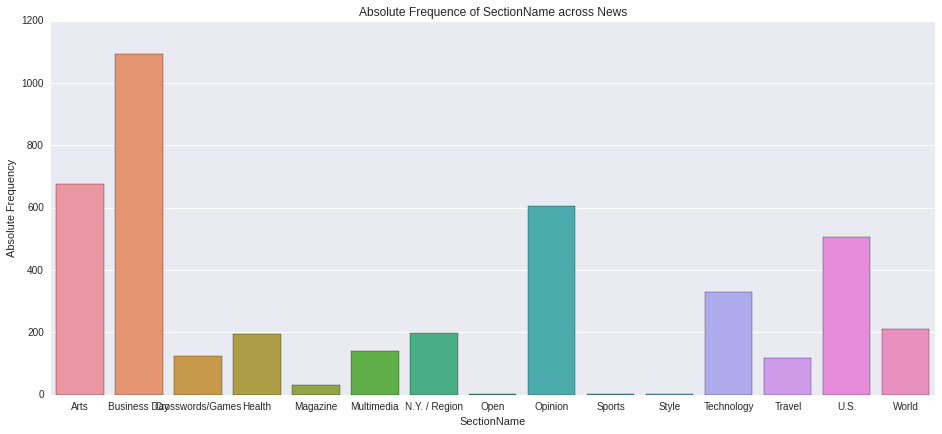

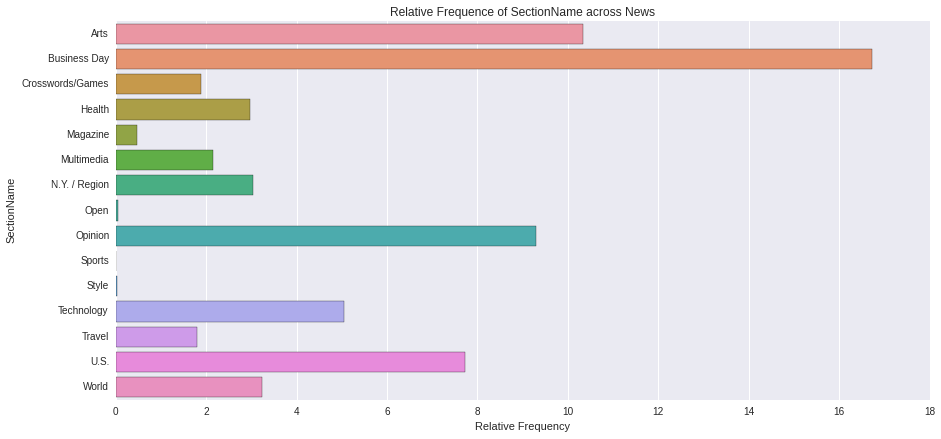

In [6]:
# Create a table with Absolute and Relative Frequency of NewsDesk
table = create_frequency_table(dataset, "SectionName")

# Create a plot using Absolute Frequency
sns.factorplot(x="SectionName", y="Absolute Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Absolute Frequence of SectionName across News')

# Create a plot using Relative Frequency
sns.factorplot(y="SectionName", x="Relative Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Relative Frequence of SectionName across News')

Section Name confirms the high frequency of news related to Business, while shows that the subsections Open, Sports and Style have the lowest frequency.

### Word Count

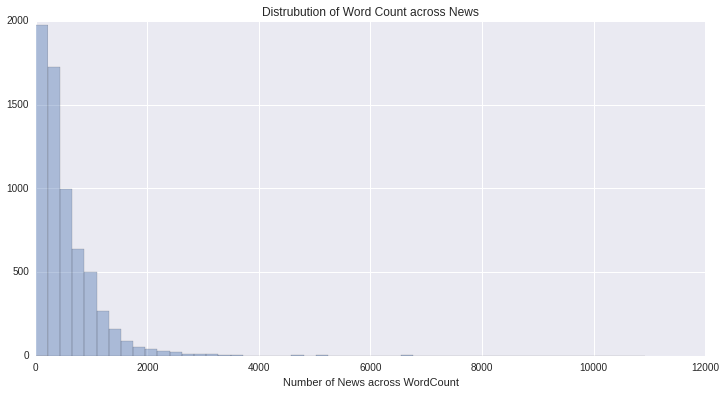

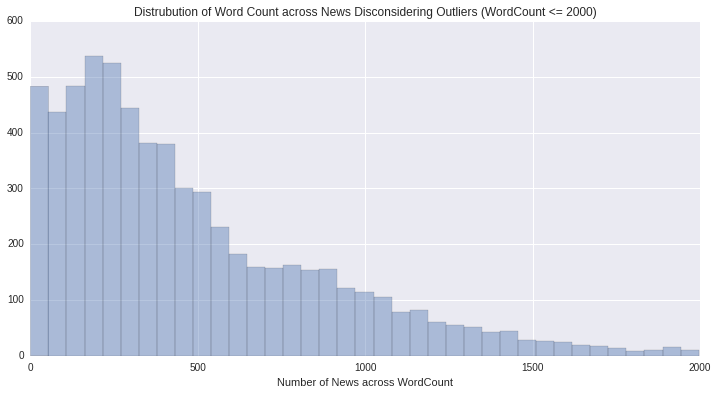

In [7]:
# Configure plot size
plt.figure(figsize=(figure_width,figure_height))

sns.distplot(dataset["WordCount"], kde=False)
plt.xlabel('Number of News across WordCount')
plt.title('Distrubution of Word Count across News')


# Configure plot size
plt.figure(figsize=(figure_width,figure_height))

sns.distplot(dataset[dataset['WordCount'] <= 2000]["WordCount"], kde=False)
plt.xlabel('Number of News across WordCount')
plt.title('Distrubution of Word Count across News Disconsidering Outliers (WordCount <= 2000)')

The word count shows a right skew on data. By disconsidering coutings with more than 2000 words, it is possible to observe with more details where the coutins distribution is concentrated: between 1 and 1000.

The next subsection collapeses the value by creaing bins.

### Word Count Bins

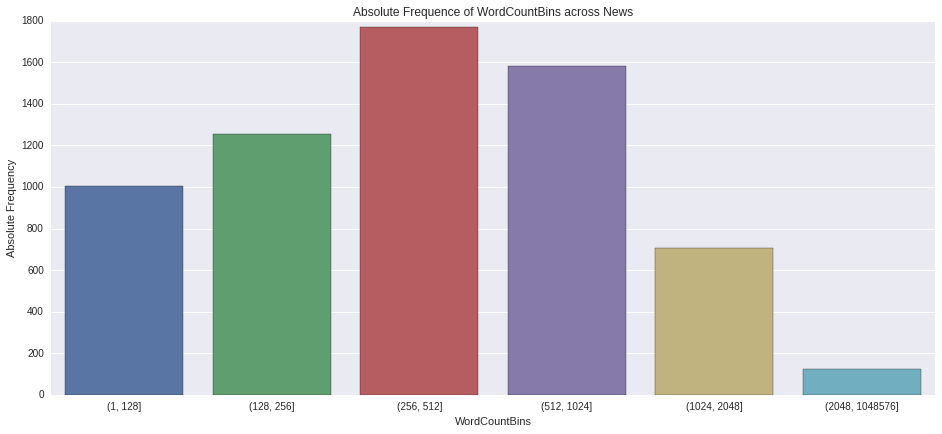

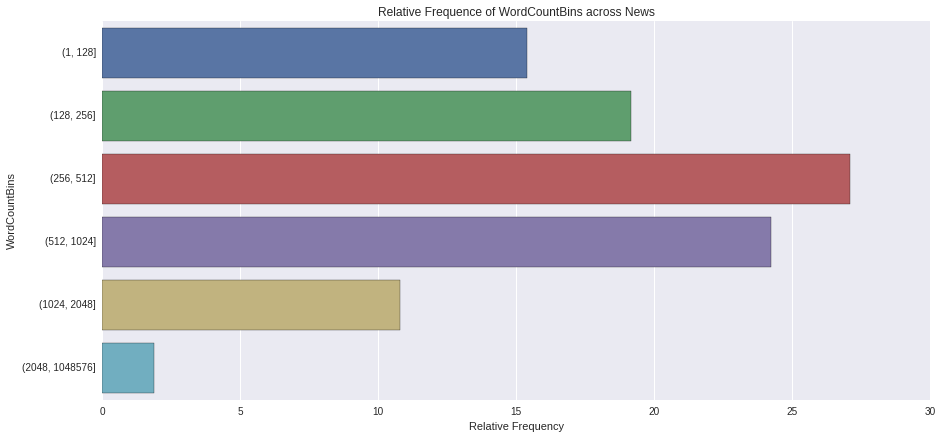

In [8]:
# Create a table with Absolute and Relative Frequency of WordCountBins
table = create_frequency_table(dataset, "WordCountBins")
# Organize rows by an appropriate order
table = table.iloc[[0, 2, 4, 5, 1, 3]]

# Create a plot using Absolute Frequency
sns.factorplot(x="WordCountBins", y="Absolute Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Absolute Frequence of WordCountBins across News')

# Create a plot using Relative Frequency
sns.factorplot(y="WordCountBins", x="Relative Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Relative Frequence of WordCountBins across News')

The bins created with word counts confirms the outliers found beyound 2000 words. The bin with highest frequency is (256, 512], which contains more than 25% of the values.

### Popular

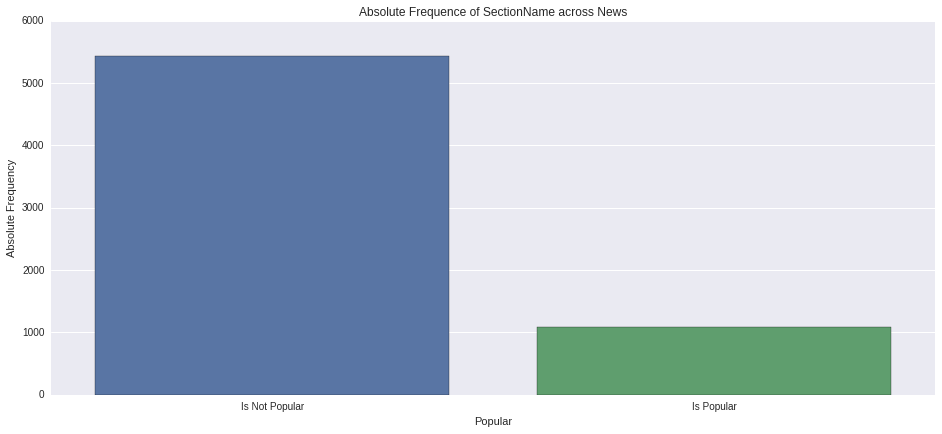

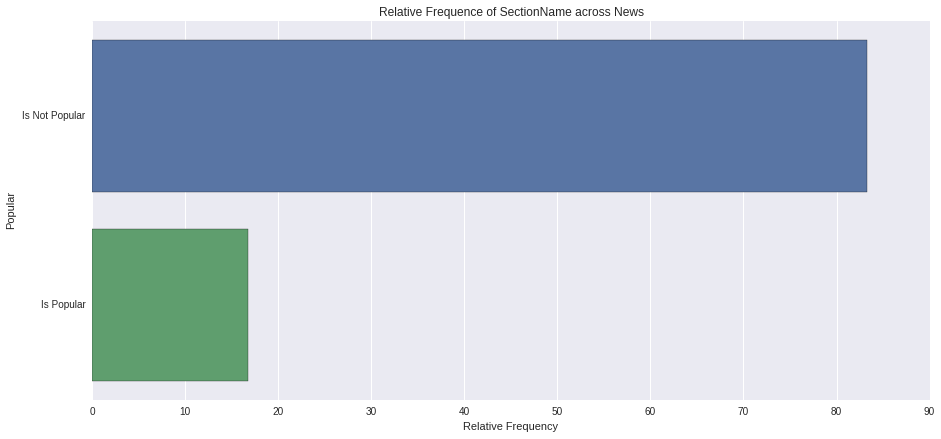

In [9]:
# Create a table with Absolute and Relative Frequency of Popular
table = create_frequency_table(dataset, "Popular")

# Map the numeric values to a descriptive name
table['Popular'] = table['Popular'].map({0:"Is Not Popular", 1:"Is Popular"})

# Create a plot using Absolute Frequency
sns.factorplot(x="Popular", y="Absolute Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Absolute Frequence of SectionName across News')

# Create a plot using Relative Frequency
sns.factorplot(y="Popular", x="Relative Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Relative Frequence of SectionName across News')

As the plot shows, the distribution between popular and unpopular news is unbalanced. There are, naturally, more unpopular news than popular. Only about 18% of the news are popular.

### Publication Month

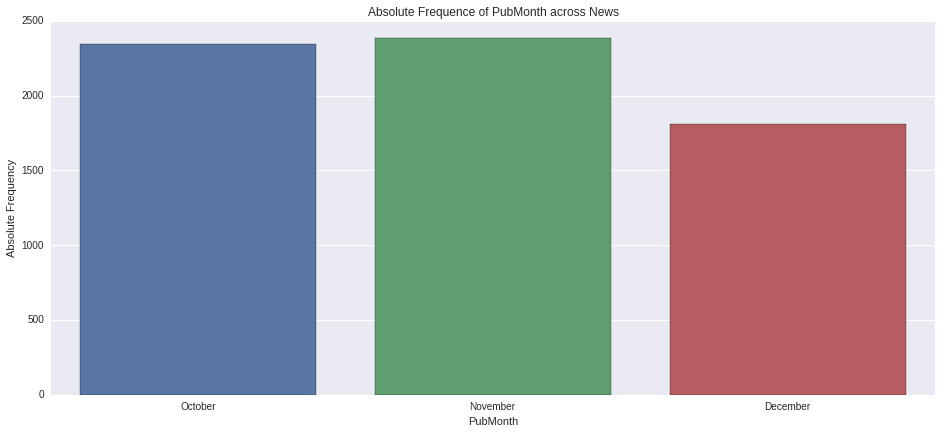

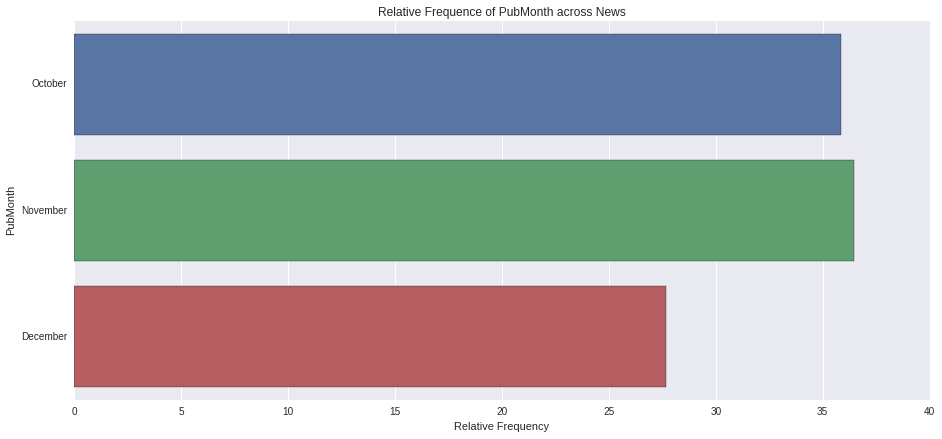

In [10]:
# Create a table with Absolute and Relative Frequency of PubMonth
table = create_frequency_table(dataset, "PubMonth")

# Map the numeric values to a descriptive name
table['PubMonth'] = table['PubMonth'].map({9:"October", 10:"November", 11:"December"})

# Create a plot using Absolute Frequency
sns.factorplot(x="PubMonth", y="Absolute Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Absolute Frequence of PubMonth across News')

# Create a plot using Relative Frequency
sns.factorplot(y="PubMonth", x="Relative Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Relative Frequence of PubMonth across News')

There are data about only 3 months: October, November and December. Besides a minor decay in the number of news in December, there is a balance between the news distribution along the months.

### Week Day

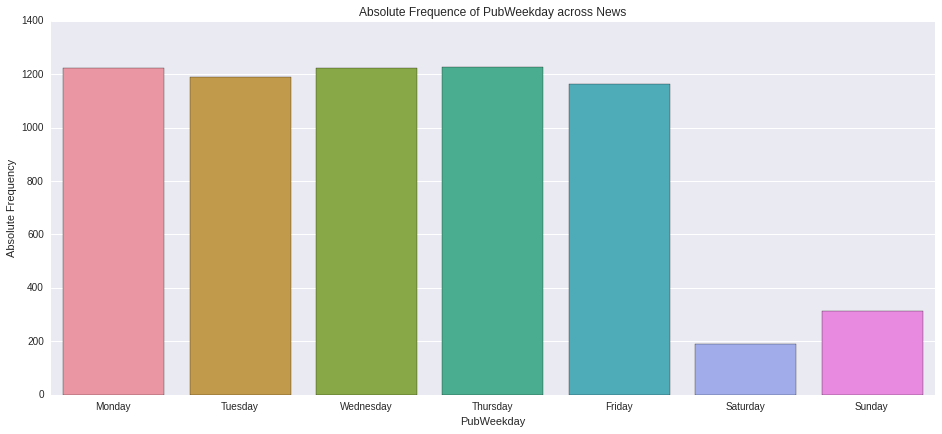

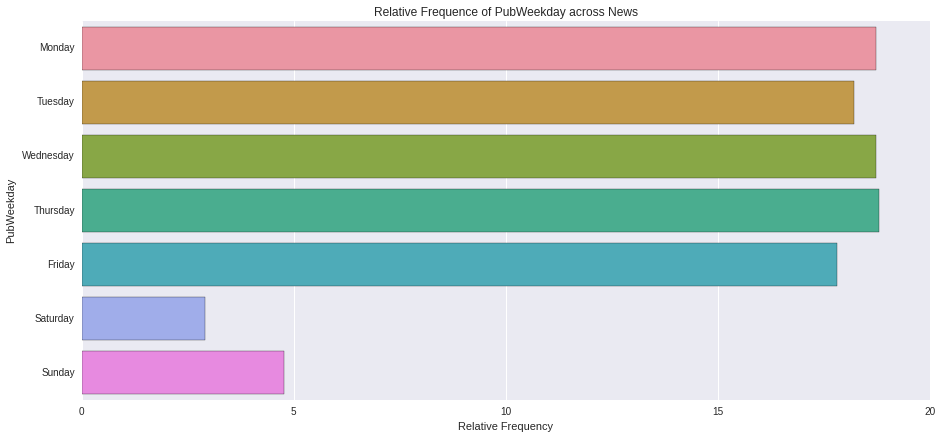

In [11]:
# Create a table with Absolute and Relative Frequency of PubWeekday
table = create_frequency_table(dataset, "PubWeekday")

# Map the numeric values to a descriptive name
table['PubWeekday'] = table['PubWeekday'].map({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"})

# Create a plot using Absolute Frequency
sns.factorplot(x="PubWeekday", y="Absolute Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Absolute Frequence of PubWeekday across News')

# Create a plot using Relative Frequency
sns.factorplot(y="PubWeekday", x="Relative Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Relative Frequence of PubWeekday across News')

The p lot shows the higher number of news on business days. Saturday is the weekday with the lowest number of news, followed by Sunday, which allows us to conclude that less news are published on weekends.

### Month Day

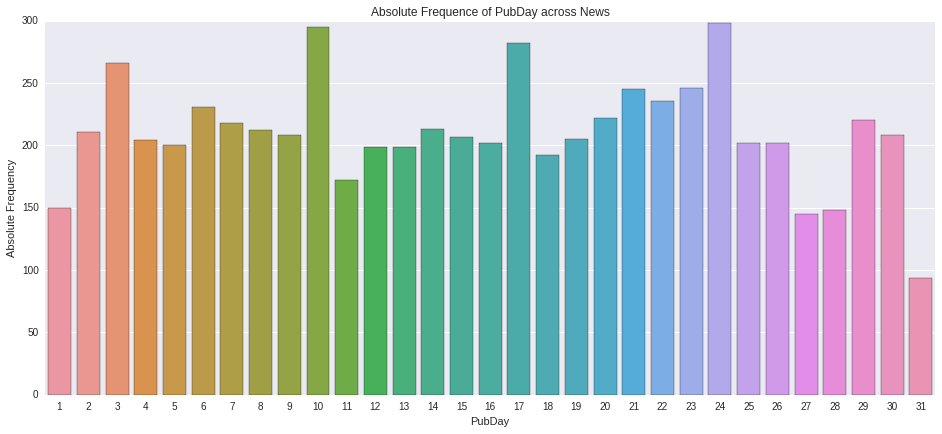

In [12]:
# Create a table with Absolute and Relative Frequency of PubDay
table = create_frequency_table(dataset, "PubDay")

# Create a plot using Absolute Frequency
sns.factorplot(x="PubDay", y="Absolute Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Absolute Frequence of PubDay across News')

Besides some peaks, there is a relative balance between month days. The exception is related to the 31th day, which is probably affected by the lack of the day on even months.

It is curious to observe the peaks on 10th and 24th days. In future, a test might be performed to observe if the peak is statistically significant.

### Publication Hour

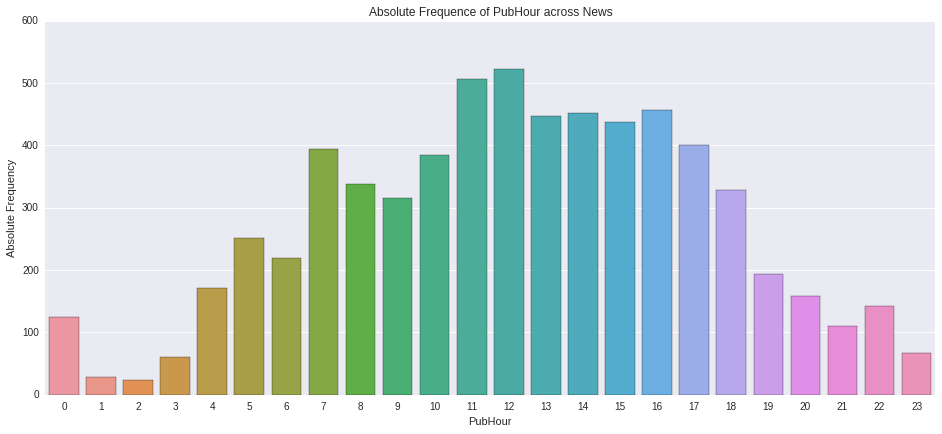

In [13]:
# Create a table with Absolute and Relative Frequency of PubHour
table = create_frequency_table(dataset, "PubHour")

# Create a plot using Absolute Frequency
sns.factorplot(x="PubHour", y="Absolute Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Absolute Frequence of PubHour across News')

The plot shows that news have a concentration of publishing in the middle of the day, during the working hours.

## Publicated on Weekend?

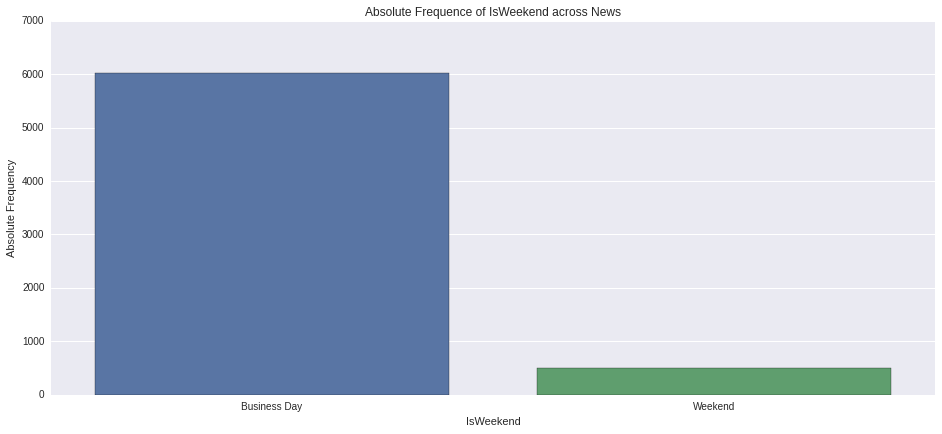

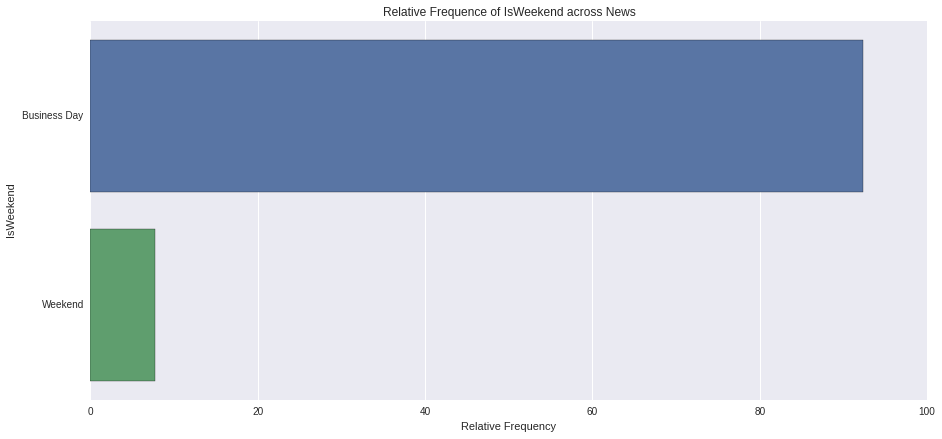

In [14]:
# Create a table with Absolute and Relative Frequency of IsWeekend
table = create_frequency_table(dataset, "IsWeekend")

# Map the numeric values to a descriptive name
table['IsWeekend'] = table['IsWeekend'].map({True:"Weekend", False:"Business Day"})

# Create a plot using Absolute Frequency
sns.factorplot(x="IsWeekend", y="Absolute Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Absolute Frequence of IsWeekend across News')

# Create a plot using Relative Frequency
sns.factorplot(y="IsWeekend", x="Relative Frequency", data=table, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('Relative Frequence of IsWeekend across News')

As observed previously, business days concentrates the higher number of publications. It is not only due to the higher number of business days, but based on the higher number of publication at each business day in contrast with Saturday and Sunday, as observed before.

## Analyzing Variables Relationships

This section presents the relationship between explanatory and response variable (*Popular*). Since the only categorical variable (*WordCount*) is already transformed into a categorical variable, using binnings, it is not presented.

### Popularity based on NewsDesk

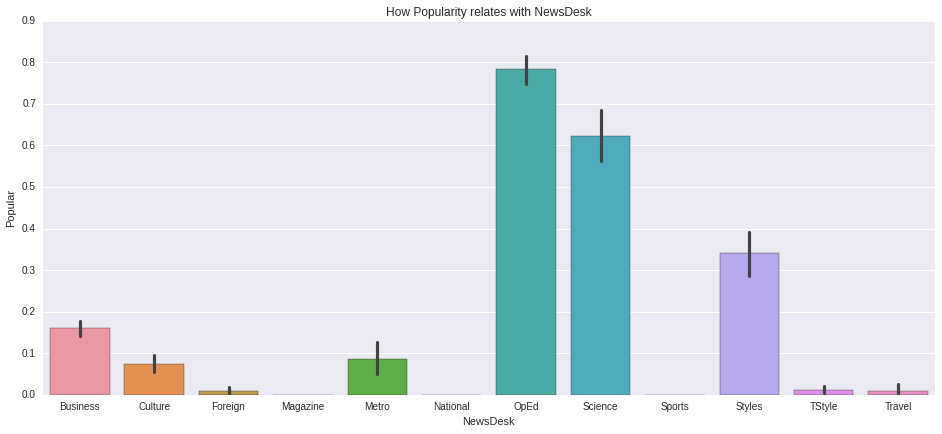

In [15]:
# Create a plot using Absolute Frequency
sns.factorplot(x="NewsDesk", y="Popular", data=dataset.sort("NewsDesk"), kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('How Popularity relates with NewsDesk')

Besides the higher number of news published in Business NewsDesk, it is possible to observe the low popularity of the category. OpEd and Science contains, proportionally, the higher number of popular news. The confidence interval of OpEd is narrower than from Science.

### SectionName

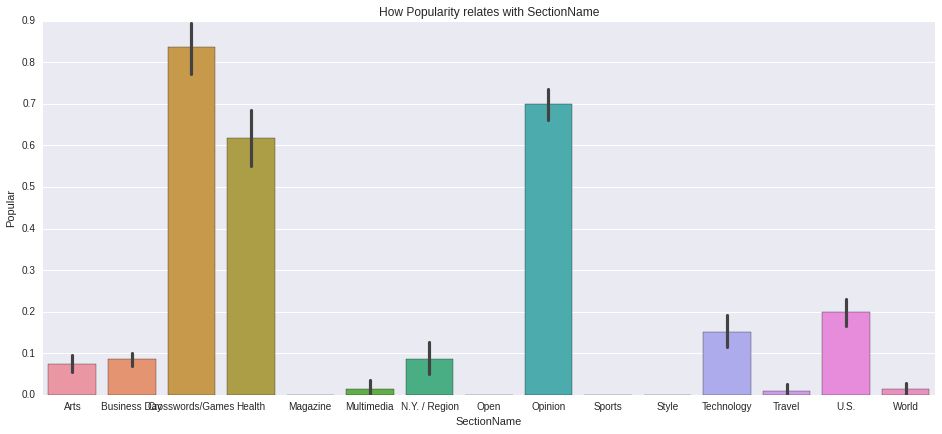

In [16]:
# Create a plot using Absolute Frequency
sns.factorplot(x="SectionName", y="Popular", data=dataset.sort("SectionName"), kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('How Popularity relates with SectionName')

Confirming the low popularity of Business news, the SectionName shows that Business Day is not popular. Crosswords/Games, Opinion and Health are the most popular sub sections, while Magazine, Open, Sports and Style do not seem to have any popular news.

### Word Count Bins

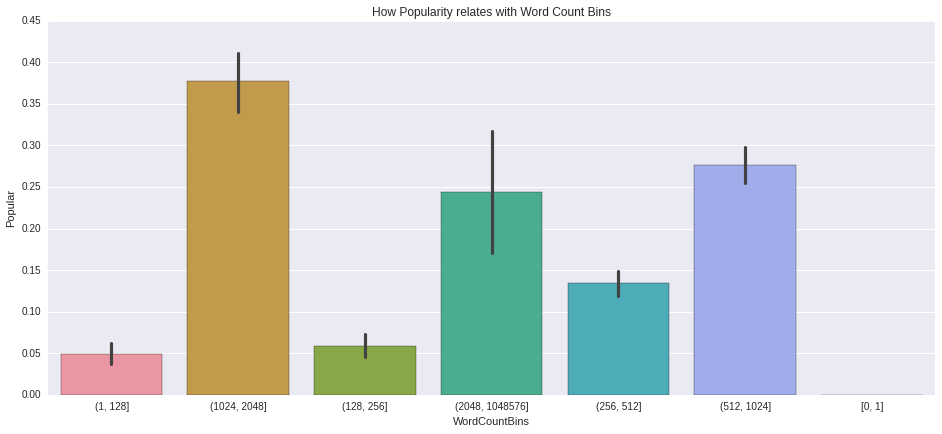

In [17]:
aux_dataset = dataset
dataset.iloc[[0, 2, 4, 5, 1, 3]]

# Create a plot using Absolute Frequency
sns.factorplot(x="WordCountBins", y="Popular", data=dataset.sort("WordCountBins"), kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('How Popularity relates with Word Count Bins')

Aparently, the higher number of words in a text seems to be related to a higher popularity, which should be properly tested on future analyses. The most unpopular bin, [0, 1], might represent some issue or particular kind of publication (e.g. photo or video) without a textual description.

### Publication Month

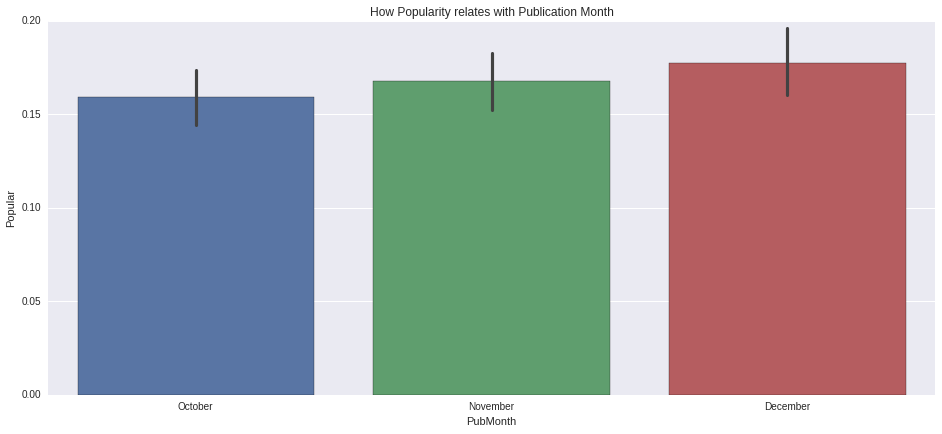

In [18]:
aux_dataset = dataset.sort("PubMonth")

# Map the numeric values to a descriptive name
aux_dataset['PubMonth'] = aux_dataset['PubMonth'].map({9:"October", 10:"November", 11:"December"})

# Create a plot using Absolute Frequency
sns.factorplot(x="PubMonth", y="Popular", data=aux_dataset, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('How Popularity relates with Publication Month')

The balance along the months is also balanced, as observed on the individual month analysis. 

### Publication Week Day

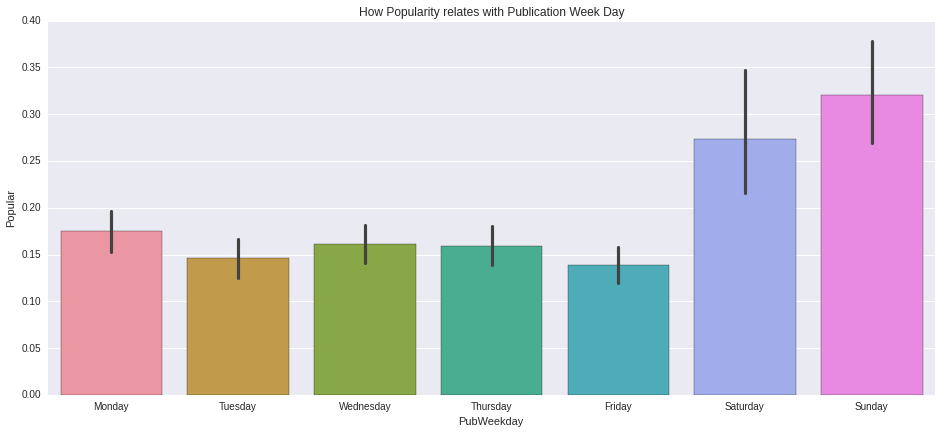

In [19]:
aux_dataset = dataset.sort("PubWeekday")

# Map the numeric values to a descriptive name
aux_dataset['PubWeekday'] = aux_dataset['PubWeekday'].map({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"})

# Create a plot using Absolute Frequency
sns.factorplot(x="PubWeekday", y="Popular", data=aux_dataset, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('How Popularity relates with Publication Week Day')

Contrary to the observed on the individual analysis, the weekend news seems to be a higher relative popularity than business days news. It might be related to the publication of special news on weekends, which requires additional analysis and information.

### Publication Day

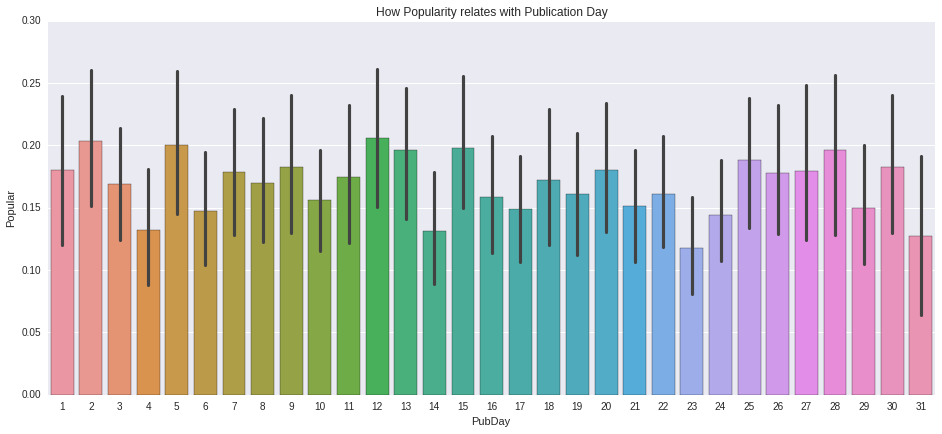

In [20]:
# Create a plot using Absolute Frequency
sns.factorplot(x="PubDay", y="Popular", data=dataset.sort("PubDay"), kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('How Popularity relates with Publication Day')

The popularity along month days is more balanced than the frequency. 

### Publication Hour

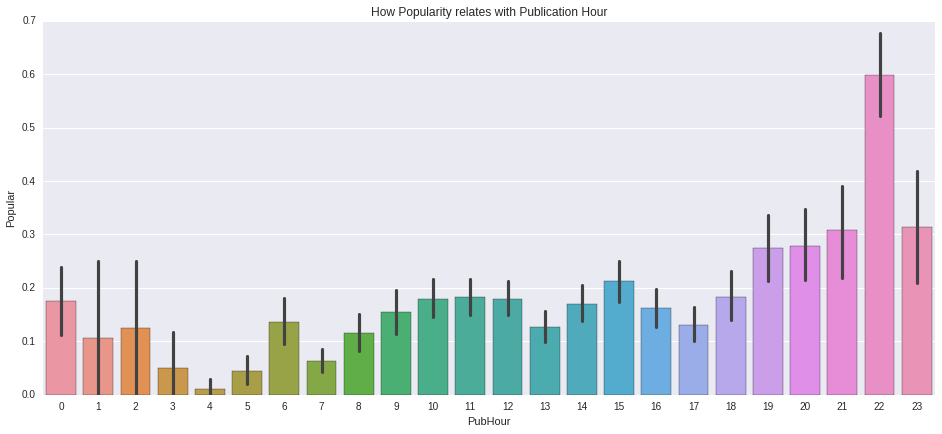

In [21]:
# Create a plot using Absolute Frequency
sns.factorplot(x="PubHour", y="Popular", data=dataset.sort("PubHour"), kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('How Popularity relates with Publication Hour')

Surprisingly, the popularity of news published out of the middle of the day seems to be higher than on the middle of the day, which has more news. Additional investigations should be performed, but one of the reasons migh be related to the fact, proportionally, there are more important/urgent news published on exceptional hours than on work hours. 

### Business Day or Weekend

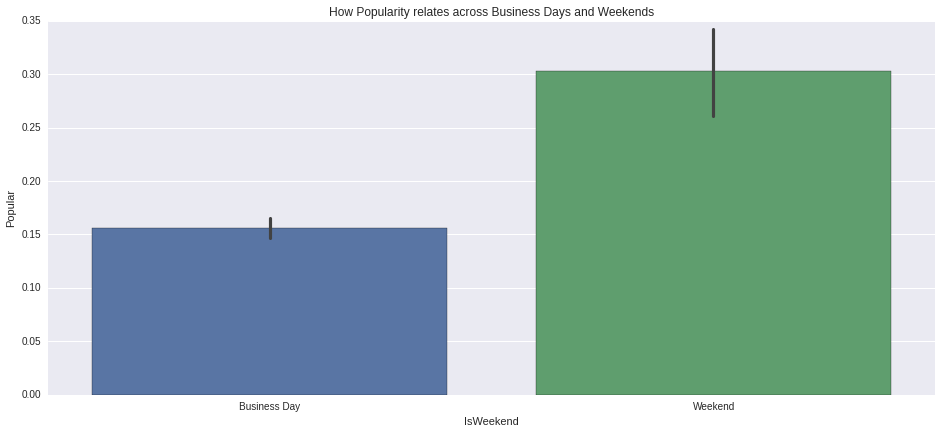

In [22]:
aux_dataset = dataset.sort("IsWeekend")
# Map the numeric values to a descriptive name
aux_dataset['IsWeekend'] = aux_dataset['IsWeekend'].map({True:"Weekend", False:"Business Day"})
# Create a plot using Absolute Frequency
sns.factorplot(x="IsWeekend", y="Popular", data=aux_dataset, kind="bar", size=figure_size, aspect=figure_aspect)
plt.title('How Popularity relates across Business Days and Weekends')

Also contraty to the expected, as observed in week days analysis, the weekends have, proportionally, more popular news than business days, besides the lower number of news.

# Summary

In this notebook I have performed the graphical presentation of individual variables from the New York Times News dataset and of the relationship between popularity and the remaining variables. The most interesting aspects noticed are:
* It might seem to have a inverse relationship between news quantity and popularity. It could be observed in NewsDesk, SectionName, PubHour and WeekDays relationships.
* The number of words indicates an influence on the popularity, since news with number of words higher than 512 contains higher relative popularity.

In addition to the observed variables, it is interesting to perform a textual analysis of the news abstracts in order to observe how the content influences the popularity. It might be performed on future course modules.